# Multiple Linear Regression

In [2]:
import numpy as np
import scipy as sp
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.figsize'] = (8, 5)
%config InlineBackend.figure_format = 'retina'

# A general model that depends on multiple factors

# $y = f(x_1, x_2, \dots, x_N) + \epsilon$

# $outcome = f(dose, age, \dots) + noise$

# A multiple linear regression model

# $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_N x_N + \epsilon$

# Diabetes dataset

In [3]:
# Meseares of various features and diabetes disease progression for 442 patients.
# Available at https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt
df = pd.read_csv('diabetes.csv')
df

AGE  SEX   BMI      BP   TC    LDL   HDL   TCH     LTG  GLU  DIS
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 11 columns]

In [4]:
df.head(3)

AGE  SEX   BMI     BP   TC    LDL   HDL  TCH     LTG  GLU  DIS
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598   87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918   69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728   85  141

### $dis = f(age, sex, bp, tc, ldl, hdl, tch, ltg, glu) + noise$

### $dis = \beta_0 + \beta_1 age + \beta_2 sex + \beta_3 bp + \dots + \beta_9 glu + \epsilon$

In [5]:
# Each column of X is a particular measurement for all patients
X = df.loc[:,'AGE':'GLU'].to_numpy()

X.shape

(442, 10)

In [6]:
# y is the diabetes progression score for all patients
y = df['DIS'].to_numpy()

y.shape

(442,)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

print(model.intercept_)  # y-intercept
print(model.coef_)  # slopes

-334.5671385187876
[-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]


In [8]:
features = list(df.columns.values)
features.remove('DIS')
features

['AGE', 'SEX', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']

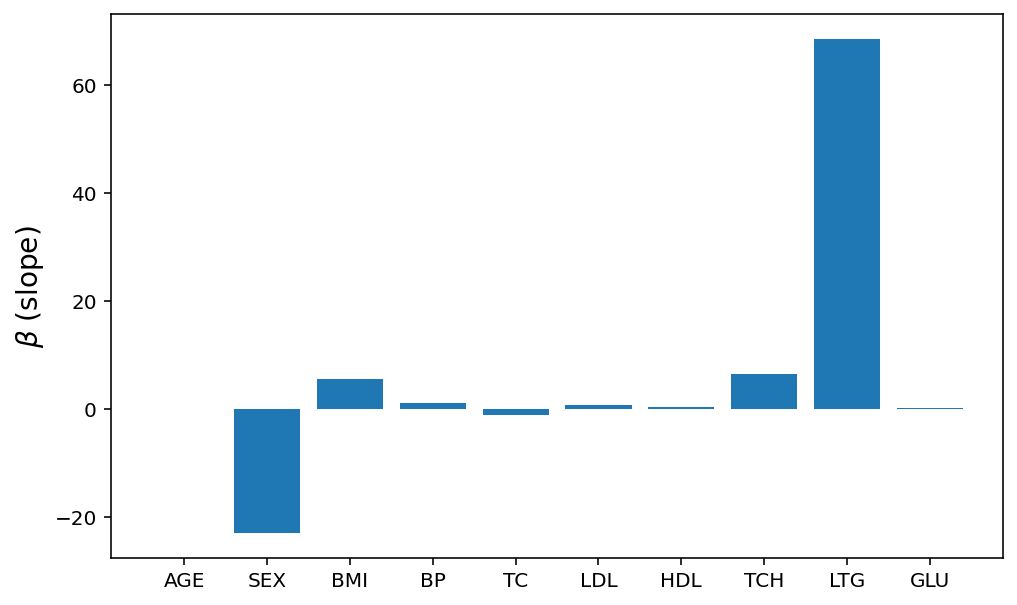

In [10]:
plt.bar(range(len(model.coef_)), model.coef_)
plt.xticks(range(len(model.coef_)), features)
plt.ylabel(r'$\beta$ (slope)');

### The data for each patient can be plotted as a point in 11 dimensions.

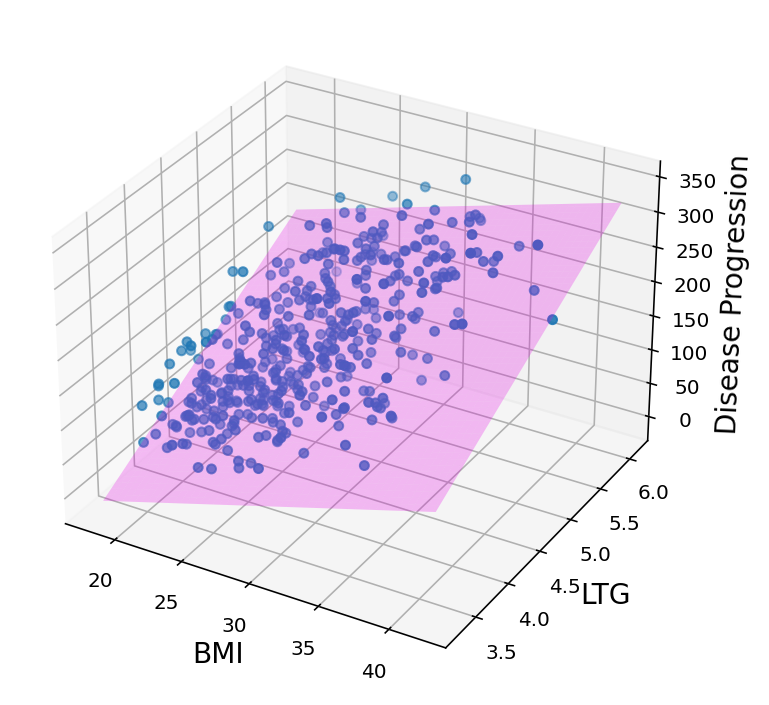

In [11]:
from mpl_toolkits import mplot3d
i = 2  # BMI
j = 8  # LTG
ax = plt.subplot(111, projection='3d')
ax.scatter(X[:,i], X[:,j], y)
ax.set_xlabel(features[i])
ax.set_ylabel(features[j])
ax.set_zlabel('Disease Progression')
irange = np.linspace(X[:,i].min(), X[:,i].max(), 100)
jrange = np.linspace(X[:,j].min(), X[:,j].max(), 100)
xx, yy = np.meshgrid(irange, jrange)
zz = model.intercept_ + xx * model.coef_[i] + yy * model.coef_[j]
ax.plot_surface(xx, yy, zz, alpha=0.25, color='magenta');
plt.tight_layout();

# <font color=darkred>Exercise</font>

Make a scatter plot of the measured vs. predicted disease progression in each patient.

In [ ]:
measuredDis = y
predictedDis = ...

plt.scatter(measuredDis, predictedDis)
plt.xlabel('Measured Diabetes')
plt.ylabel('Predicted Diabetes');

# <font color=darkred>Exercise</font>

1. Plot the residuals between measured and predicted disease progression in each patient.
2. Are the residuals normally distributed?
3. Compute the mean squared error (MSE) for the model predictions.

In [ ]:
residuals = ...
MSE = ...

print(f"MSE = {MSE}")

plt.plot(residuals)
plt.xlabel('Patients')
plt.ylabel('Residuals');

# <font color=darkred>Exercise</font>

Use the model to predict diabetes progression in a new patient.

In [10]:
age = 50
sex = 1
bmi = 20
bp = 125
tc = 150
ldl = 100
hdl = 55
tch = 6.5
ltg = 4
glu = 120

newPatientData = np.array([age, sex, bmi, bp, tc, ldl, hdl, tch, ltg, glu]).reshape((1,-1))  # row array
newPatientData

array([[ 50. ,   1. ,  20. , 125. , 150. , 100. ,  55. ,   6.5,   4. ,
        120. ]])

In [ ]:
predictedNewPatientDis = ...

predictedNewPatientDis

# But the features have different unrelated units and scales.

In [12]:
df.head(3)

AGE  SEX   BMI     BP   TC    LDL   HDL  TCH     LTG  GLU  DIS
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598   87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918   69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728   85  141

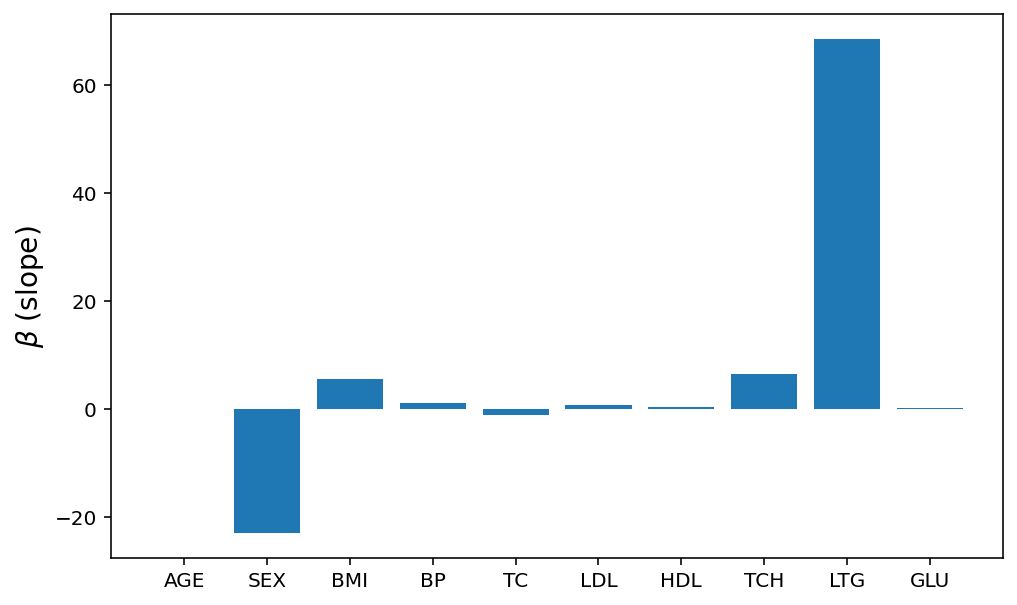

In [13]:
n = len(model.coef_)
plt.bar(range(n), model.coef_)
plt.xticks(range(n), features)
plt.ylabel(r'$\beta$ (slope)');

# Standardize data features

Z-score standardization:

1. Subtract the mean of each feature.
2. Normalize the variance of each feature.

In [14]:
featureMeans = X.mean(axis=0)
featureStd = X.std(axis=0)

Xs = (X - featureMeans) / featureStd

In [15]:
Xs.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
# center y so we don't need to use a y-intercept
disMean = y.mean()
ys = y - disMean

In [20]:
smodel = LinearRegression(fit_intercept=False)
smodel.fit(Xs, ys);

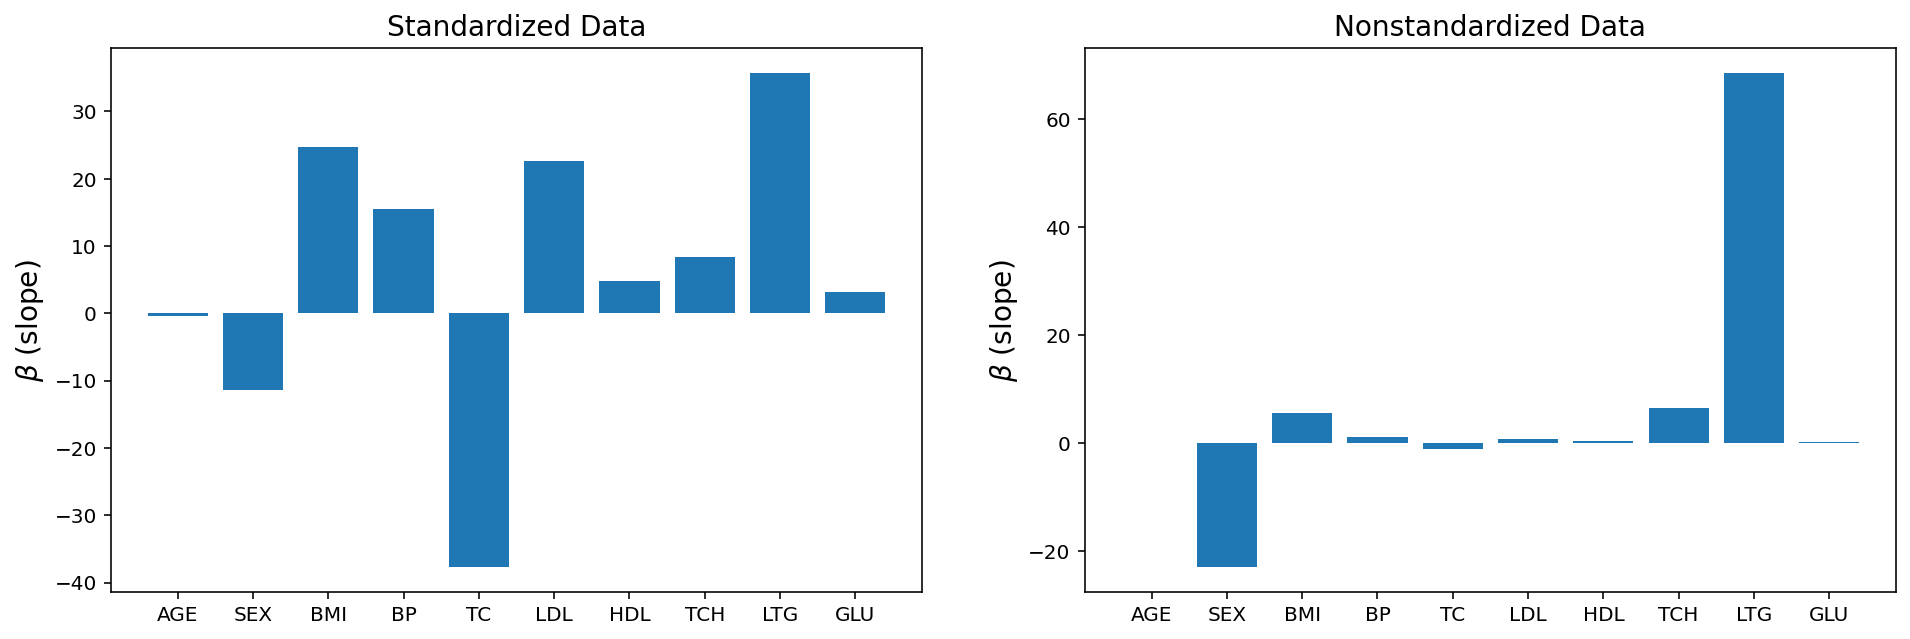

In [21]:
n = len(smodel.coef_)
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.bar(range(n), smodel.coef_)
plt.xticks(range(n), features)
plt.ylabel(r'$\beta$ (slope)')
plt.title('Standardized Data');
plt.subplot(1,2,2)
plt.bar(range(n), model.coef_)
plt.xticks(range(n), features)
plt.ylabel(r'$\beta$ (slope)')
plt.title('Nonstandardized Data');

# <font color=darkred>Exercise</font>

Use the model based on standardized data to predict diabetes progression in a new patient.

In [20]:
newPatientData = np.array([age, sex, bmi, bp, tc, ldl, hdl, tch, ltg, glu]).reshape((1,-1))  # row array
newPatientData

array([[ 50. ,   1. ,  20. , 125. , 150. , 100. ,  55. ,   6.5,   4. ,
        120. ]])

In [ ]:
newPatientStandardizedData = ...
predictedNewPatientDis = ...

predictedNewPatientDis

### Visualizing the diabetes dataset

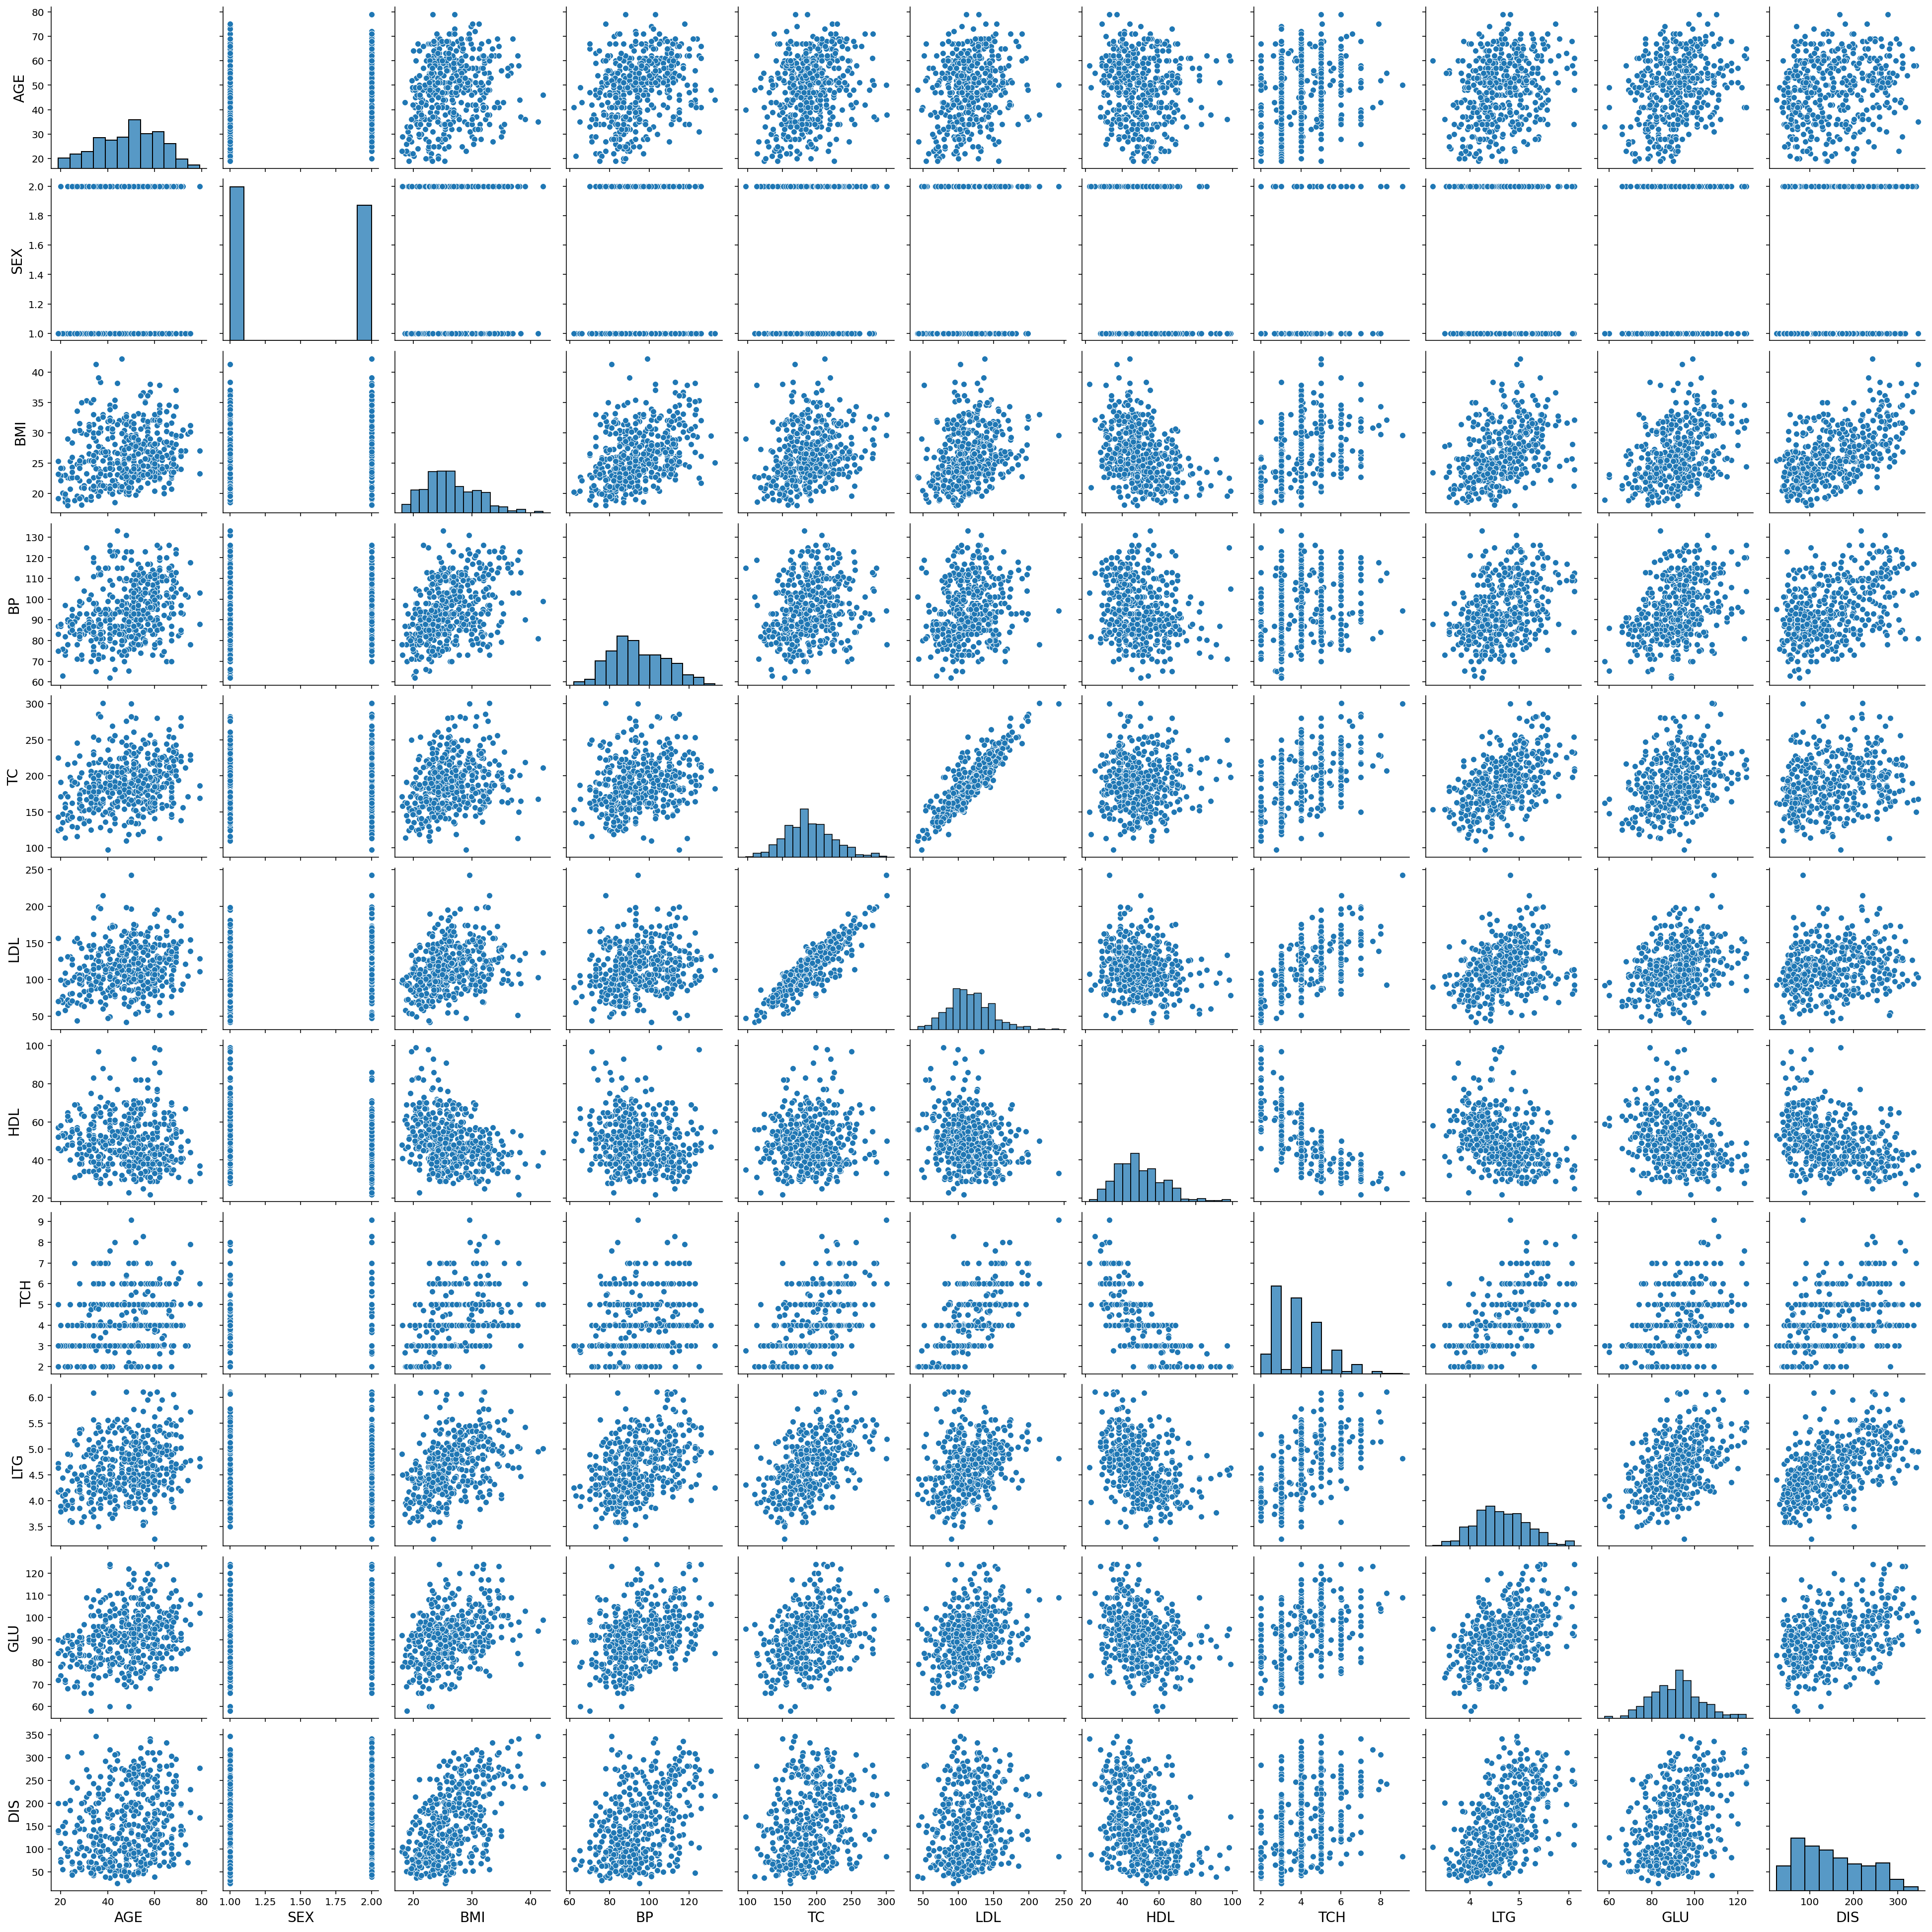

In [21]:
sns.pairplot(df);

# Correlation

![](images/correlation.png)

In [30]:
df.corr()

AGE       SEX       BMI        BP        TC       LDL       HDL  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
TC   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
LDL  0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
HDL -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
TCH  0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
LTG  0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
GLU  0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
DIS  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

          TCH       LTG       GLU       DIS  
AGE  0.203841  0.270774  0.301731  0.187889  
SEX  0.332115  0.149916  0.208133  0.043062  
BMI  0.413807  0.446157  0.388680  0.586450  
BP   0.257650  0.393480  0.390430  0.441482  
TC   0.542207  0.515503  0.325717  0.212022  
LDL  0.659817  0.318357  0.290600  0.174054  
HDL -0.738493 -0.398577 -0.273697 -0.394789  
TCH  1.000000  0.617859  0.417212  0.430453  
LTG  0.617859  1.000000  0.464669  0.565883  
GLU  0.417212  0.464669  1.000000  0.382483  
DIS  0.430453  0.565883  0.382483  1.000000

In [50]:
df.corr().style.background_gradient(cmap='cool')

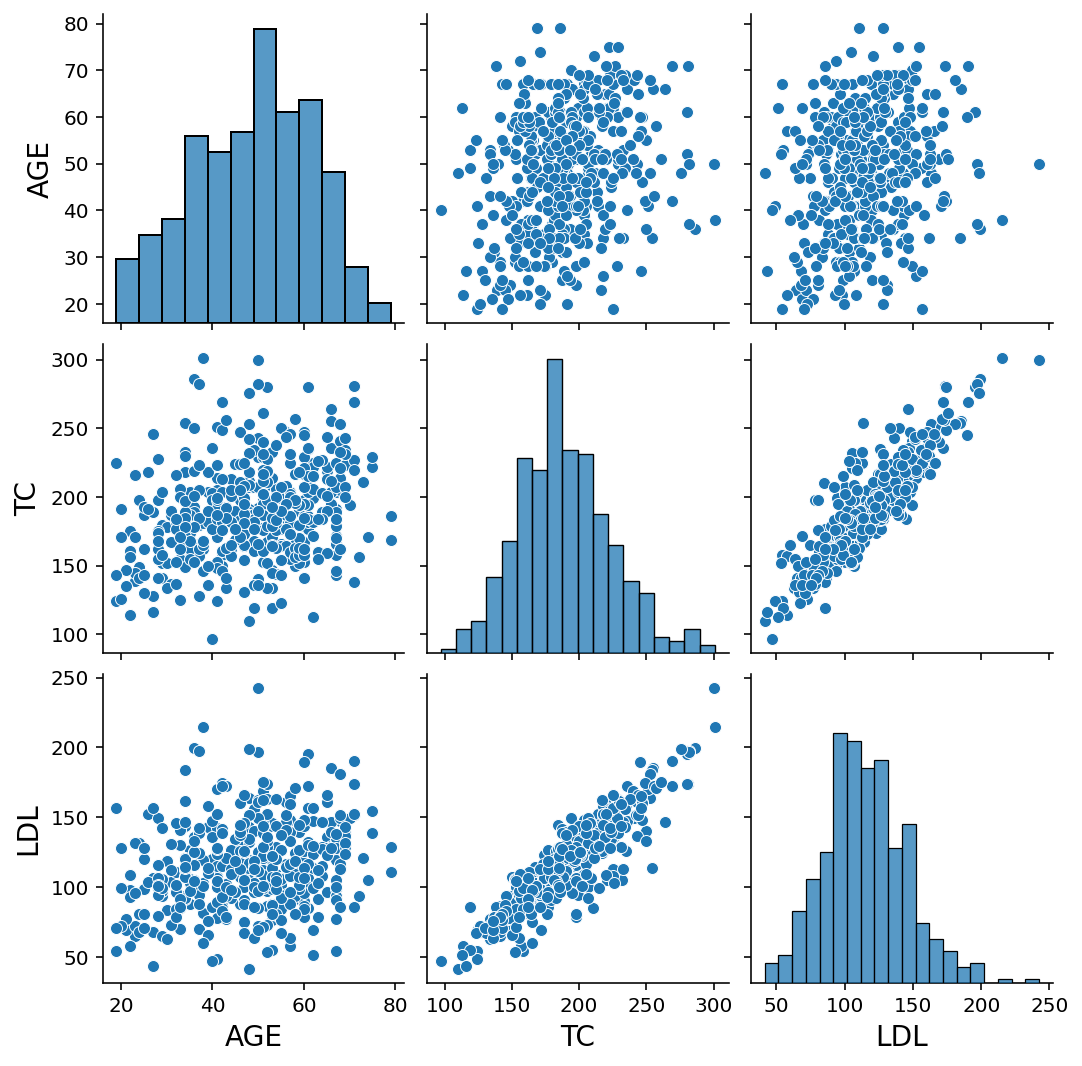

In [51]:
sns.pairplot(df[['AGE','TC','LDL']]);

# <font color=darkred>Exercise</font>

Obtain a new model using all of the standardized data except LDL.

In [22]:
import copy
features_noLDL = copy.copy(features)
features_noLDL.remove('LDL')
print(features)
print(features_noLDL)

['AGE', 'SEX', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']
['AGE', 'SEX', 'BMI', 'BP', 'TC', 'HDL', 'TCH', 'LTG', 'GLU']


In [23]:
Xs_noLDL = ...
smodel_noLDL = ...
smodel_noLDL.fit(Xs_noLDL, ys);

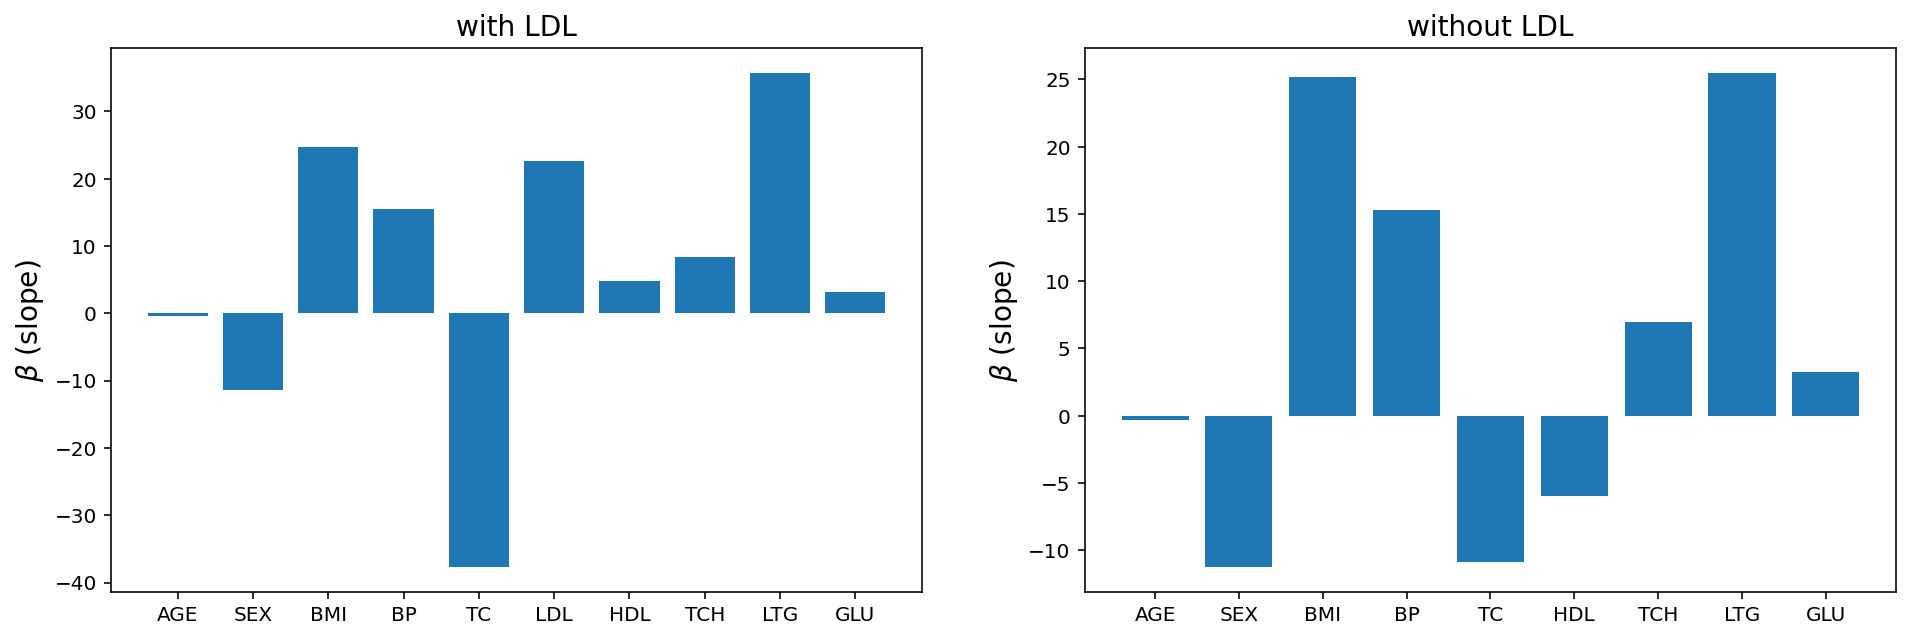

In [24]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
n = len(smodel.coef_)
plt.bar(range(n), smodel.coef_)
plt.xticks(range(n), features)
plt.ylabel(r'$\beta$ (slope)')
plt.title('with LDL');
plt.subplot(1,2,2)
n = len(smodel_noLDL.coef_)
plt.bar(range(n), smodel_noLDL.coef_)
plt.xticks(range(n), features_noLDL)
plt.ylabel(r'$\beta$ (slope)')
plt.title('without LDL');

# <font color=darkred>Example</font>

Obtain a new model using all of the standardized data except TC.

In [25]:
features_noTC = copy.copy(features)
features_noTC.remove('TC')
print(features_noTC)

['AGE', 'SEX', 'BMI', 'BP', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']


In [26]:
dfXs = pd.DataFrame(Xs, columns=features)
Xs_noTC = dfXs[features_noTC].to_numpy()
smodel_noTC = LinearRegression(fit_intercept=False)
smodel_noTC.fit(Xs_noTC, ys);

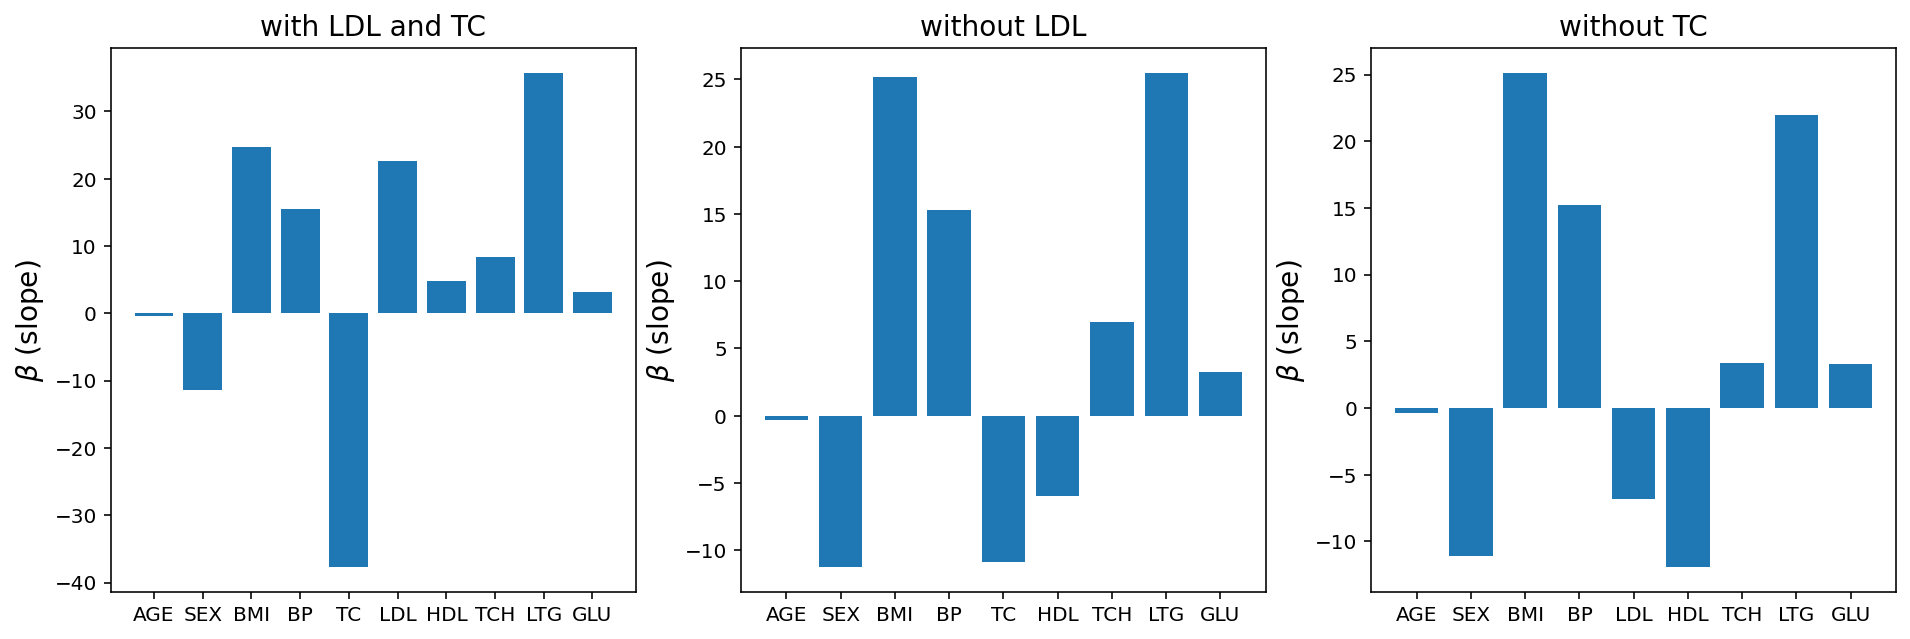

In [27]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
n = len(smodel.coef_)
plt.bar(range(n), smodel.coef_)
plt.xticks(range(n), features)
plt.ylabel(r'$\beta$ (slope)')
plt.title('with LDL and TC');
plt.subplot(1,3,2)
n = len(smodel_noLDL.coef_)
plt.bar(range(n), smodel_noLDL.coef_)
plt.xticks(range(n), features_noLDL)
plt.ylabel(r'$\beta$ (slope)')
plt.title('without LDL');
plt.subplot(1,3,3)
n = len(smodel_noTC.coef_)
plt.bar(range(n), smodel_noTC.coef_)
plt.xticks(range(n), features_noTC)
plt.ylabel(r'$\beta$ (slope)')
plt.title('without TC');

## Oridary Least Squares (OLS) Multiple Linear Regression with statsmodels

In [30]:
import statsmodels.api as sm

sm_model = sm.OLS(ys, Xs_noLDL)
results = sm_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.516
Model:                            OLS   Adj. R-squared (uncentered):              0.505
Method:                 Least Squares   F-statistic:                              51.20
Date:                Thu, 08 Apr 2021   Prob (F-statistic):                    9.61e-63
Time:                        12:43:12   Log-Likelihood:                         -2387.0
No. Observations:                 442   AIC:                                      4792.
Df Residuals:                     433   BIC:                                      4829.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3095      2.839     -0.109      0.913      -5.890       5.271
x2           -11.2337      2.909     -3.861      0.000     -16.952      -5.515
x3            25.1440      3.151      7.981      0.000      18.952      31.336
x4            15.3274      3.111      4.927      0.000       9.213      21.442
x5           -10.8709      5.416     -2.007      0.045     -21.515      -0.227
x6            -5.9628      6.599     -0.904      0.367     -18.932       7.007
x7             6.9515      7.609      0.914      0.361      -8.003      21.906
x8            25.4997      3.725      6.845      0.000      18.178      32.822
x9             3.2873      3.138      1.048      0.295      -2.880       9.455
==============================================================================
Omnibus:                        1.653   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.535
Skew:                           0.041   Prob(JB):                        0.464
Kurtosis:                       2.723   Cond. No.                         7.97
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# slopes
beta = results.params
beta

array([ -0.30953849, -11.23365768,  25.14399502,  15.32739989,
       -10.87087667,  -5.96280197,   6.95149256,  25.49971822,
         3.28732801])

In [32]:
# confidence interval
ci = results.conf_int(alpha=0.05)
ci

array([[ -5.89033294,   5.27125596],
       [-16.9518967 ,  -5.51541866],
       [ 18.95155255,  31.3364375 ],
       [  9.21309694,  21.44170283],
       [-21.51510852,  -0.22664483],
       [-18.93217828,   7.00657433],
       [ -8.00346635,  21.90645147],
       [ 18.17753528,  32.82190115],
       [ -2.88041196,   9.45506798]])

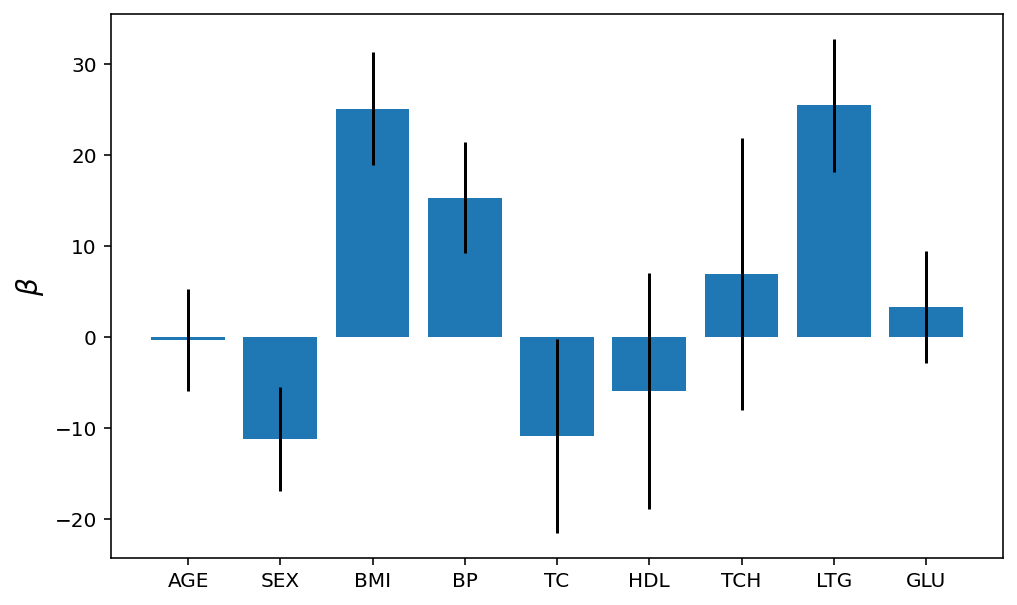

In [33]:
n = len(beta)
below = beta - ci[:,0]
above = ci[:,1] - beta

plt.bar(range(n), beta, yerr=[below, above])
plt.xticks(range(n), features_noLDL)
plt.ylabel(r'$\beta$');

# <font color=darkred>Exercise</font>

Generate a new model based ONLY on those features you think are important.